In [1]:
import kamping.parser.network as network
import kamping.parser.utils as utils
import networkx as nx

In [2]:
# graph  = network.KeggGraph('../data/kgml_hsa/hsa04910.xml', type='metabolite', protein_group_as_interaction=False)
graph  = network.KeggGraph('../data/kgml_hsa/hsa00010.xml', type='gene', protein_group_as_interaction=True, multi_substrate_as_interaction=True)
# sort by entry1 and entry2
#graph.interaction.sort_values(by=['entry1', 'entry2']).loc[(graph.interaction['entry2'] == '5160') | (graph.interaction['entry1'] == '5160' )]

In [3]:
print(graph)

KEGG Pathway: 
            [Title]: Glycolysis / Gluconeogenesis 
 
            [Name]: path:hsa00010 
 
            [Org]: hsa 
 
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010 
 
            [Image]: https://www.kegg.jp/kegg/pathway/hsa/hsa00010.png 
 
            [Link]: https://www.kegg.jp/kegg-bin/show_pathway?hsa00010 
 
            Graph type: gene 

            Number of Proteins: 67 

            Number of Compounds: 0 

            Protein ID type : kegg 

            Compound ID type : kegg 

            Number of Nodes: 67 
 
            Number of Edges: 559


In [4]:
len(graph.proteins)

67

In [5]:
from kamping.parser import convert
import h5py
import kamping.data.utils
# read protein embedding from h5
converter = convert.Converter(species='hsa', target='uniprot')
converter.convert(graph) 
protein_embedding = kamping.data.utils.get_uniprot_protein_embeddings(graph, '../data/embedding/protein_embedding.h5')
protein_embedding

{'O14556': array([-0.01290235,  0.03892787,  0.04290901, ...,  0.00779273,
         0.05085527,  0.03955539], dtype=float32),
 'Q9BUM1': array([ 0.04416827,  0.04723667,  0.04911686, ..., -0.02928363,
        -0.02456551, -0.00408981], dtype=float32),
 'P28332': array([ 0.00624179,  0.08163501,  0.03271856, ..., -0.0377516 ,
         0.05831566, -0.01255933], dtype=float32),
 'P07864': array([ 0.03969654,  0.0953199 ,  0.04943077, ..., -0.00149495,
         0.02077571,  0.01027405], dtype=float32),
 'Q6DKJ3': array([ 0.05442058,  0.11814318,  0.02858377, ..., -0.05073699,
         0.00721216,  0.00439214], dtype=float32),
 'P49419': array([0.05447634, 0.07377876, 0.03366219, ..., 0.00594093, 0.02840348,
        0.01418862], dtype=float32),
 'P15259': array([ 0.05464792,  0.11138546,  0.00791612, ..., -0.09321539,
        -0.01064975,  0.04277494], dtype=float32),
 'P04075': array([ 0.05876995,  0.10336649,  0.02221776, ..., -0.02378453,
        -0.00770402,  0.05775059], dtype=float32)

In [11]:
# save protein embedding dict to h5
with h5py.File('../tests/data/hsa00010_protein_embeddings.h5', 'w') as h5file:
    for key, value in protein_embedding.items():
        h5file.create_dataset(key, data=value)

In [7]:
graph.interaction.sort_values(by=['entry1', 'entry2']).loc[(graph.interaction['entry1'] == 'C00036')]

,entry1,entry2,type,subtype_name,subtype_value,entry1_type,entry2_type


{'P14550': Text(4145.0, 2014.0, 'P14550'),
 'P07327': Text(2934.0, 1942.0, 'P07327'),
 'V9HWI0': Text(2976.0, 1870.0, 'V9HWI0'),
 'P00325': Text(2790.0, 1726.0, 'P00325'),
 'V9HW50': Text(3201.0, 1582.0, 'V9HW50'),
 'P00326': Text(429.0, 862.0, 'P00326'),
 'P08319': Text(850.0, 862.0, 'P08319'),
 'V9HVX7': Text(3324.0, 862.0, 'V9HVX7'),
 'P11766': Text(3735.0, 862.0, 'P11766'),
 'Q6IRT1': Text(4575.0, 862.0, 'Q6IRT1'),
 'P28332': Text(4883.0, 862.0, 'P28332'),
 'Q8IUN7': Text(5583.0, 862.0, 'Q8IUN7'),
 'P40394': Text(2207.0, 1006.0, 'P40394'),
 'P05091': Text(2428.0, 934.0, 'P05091'),
 'A0A384NPN7': Text(3712.0, 1078.0, 'A0A384NPN7'),
 'P30838': Text(3143.0, 1150.0, 'P30838'),
 'Q6PKA6': Text(3333.0, 1294.0, 'Q6PKA6'),
 'P30837': Text(2319.0, 1222.0, 'P30837'),
 'A0A384MTJ7': Text(2587.0, 1366.0, 'A0A384MTJ7'),
 'P43353': Text(2235.0, 1438.0, 'P43353'),
 'P49189': Text(2705.0, 1510.0, 'P49189'),
 'P51648': Text(3501.0, 1654.0, 'P51648'),
 'P49419': Text(2893.0, 1798.0, 'P49419'),
 'Q96

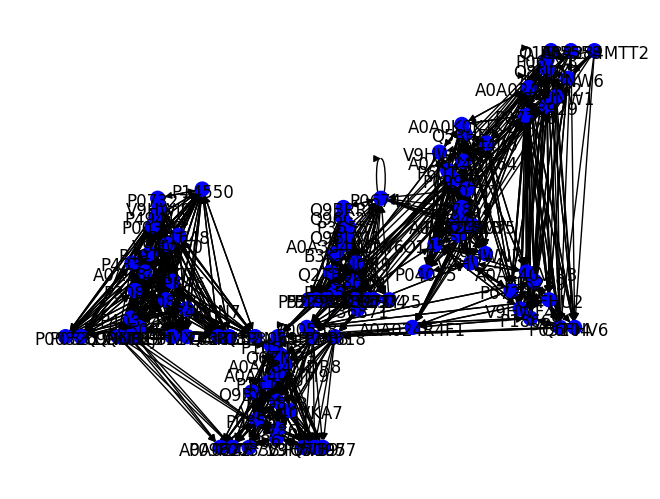

In [8]:
from matplotlib import pyplot as plt
graph_nx = graph.to_networkx()
color_map = {'compound': 'green', 'gene': 'blue'}

# Extract node types
node_types = nx.get_node_attributes(graph_nx, 'type')
node_colors = [color_map.get(node_types.get(node), 'gray') for node in graph_nx.nodes]
# set label positions offset y 

pos = nx.nx_agraph.graphviz_layout(graph_nx, prog='dot')  # positions for all nodes
label_pos = {node: (pos[0], pos[1]-20) for node, pos in pos.items()}
nx.draw(graph_nx, node_size=100, pos=pos, node_color=node_colors, with_labels=False)
nx.draw_networkx_labels(graph_nx, pos=label_pos, labels={node: node for node in graph_nx.nodes})

In [9]:
protein_embedding = utils.get_protein_embedding('../data/embedding/protein_embedding.h5')
metabolite_embedding = utils.get_mol_embedding(graph, transformer='morgan')

AttributeError: module 'kamping.parser.utils' has no attribute 'get_protein_embedding'

In [ ]:
data = utils.convert_to_pyg_data(graph, mol_embedding=metabolite_embedding, protein_embedding=protein_embedding)

In [ ]:
data